In [59]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sb

In [10]:
diner_dataset = "datasets/diners_monthly_bills.csv"
df = pd.read_csv(diner_dataset)
df

,total_bill,tip,sex,smoker,day,time,size
0,92.73,$2.53,Female,No,Fri,Dinner,1
1,$79.37,2.75,Female,No,Fri,Dinner,2
2,$52.92,6.47,Female,Yes,Sat,Lunch,3
3,82.99,19.02,Male,No,Fri,Dinner,6
4,$86.56,12.62,Male,No,Tue,Lunch,6
...,...,...,...,...,...,...,...
495,33.36,4.51,Male,No,Wed,Dinner,5
496,49.25,8.36,Female,Yes,Sun,Lunch,2
497,65.52,19.35,Male,Yes,Mon,Lunch,6
498,57.13,$12.57,Female,Yes,Mon,Lunch,4


## Adat tisztítás és átalakítás
Megtisztítjuk és átalakítjuk az adatokat, hogy a többváltozós lineáris regressziót letudjuk folytatni

# 1. "$" eltüntetése total_bills és tip oszlopokból

In [11]:
df.dtypes

total_bill    object
tip           object
sex           object
smoker        object
day           object
time          object
size           int64
dtype: object

In [33]:
sr_total_bill = df["total_bill"]
sr_total_bill

0       92.73
1      $79.37
2      $52.92
3       82.99
4      $86.56
        ...  
495     33.36
496     49.25
497     65.52
498     57.13
499     44.14
Name: total_bill, Length: 500, dtype: object

In [36]:
for i in range(0, len(sr_total_bill) -1):
    old_amount = sr_total_bill[i]
    try:
        new_amount = old_amount.replace("$", "")
        df["total_bill"][i] = new_amount
    except ValueError:
        continue
df

C:\Users\mmarc\AppData\Local\Temp\ipykernel_24000\623977458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][i] = new_amount
C:\Users\mmarc\AppData\Local\Temp\ipykernel_24000\623977458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][i] = new_amount
C:\Users\mmarc\AppData\Local\Temp\ipykernel_24000\623977458.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bill"][i] = new_amount
C:\U

,total_bill,tip,sex,smoker,day,time,size
0,92.73,$2.53,Female,No,Fri,Dinner,1
1,79.37,2.75,Female,No,Fri,Dinner,2
2,52.92,6.47,Female,Yes,Sat,Lunch,3
3,82.99,19.02,Male,No,Fri,Dinner,6
4,86.56,12.62,Male,No,Tue,Lunch,6
...,...,...,...,...,...,...,...
495,33.36,4.51,Male,No,Wed,Dinner,5
496,49.25,8.36,Female,Yes,Sun,Lunch,2
497,65.52,19.35,Male,Yes,Mon,Lunch,6
498,57.13,$12.57,Female,Yes,Mon,Lunch,4


In [37]:
sr_tips = df["tip"]
for i in range(0, len(sr_tips) -1):
    old_amount = sr_tips[i]
    try:
        new_amount = old_amount.replace("$", "")
        df["tip"][i] = new_amount
    except ValueError:
        continue
df

C:\Users\mmarc\AppData\Local\Temp\ipykernel_24000\1204626126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tip"][i] = new_amount
C:\Users\mmarc\AppData\Local\Temp\ipykernel_24000\1204626126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tip"][i] = new_amount
C:\Users\mmarc\AppData\Local\Temp\ipykernel_24000\1204626126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tip"][i] = new_amount
C:\Users\mmarc\AppData

,total_bill,tip,sex,smoker,day,time,size
0,92.73,2.53,Female,No,Fri,Dinner,1
1,79.37,2.75,Female,No,Fri,Dinner,2
2,52.92,6.47,Female,Yes,Sat,Lunch,3
3,82.99,19.02,Male,No,Fri,Dinner,6
4,86.56,12.62,Male,No,Tue,Lunch,6
...,...,...,...,...,...,...,...
495,33.36,4.51,Male,No,Wed,Dinner,5
496,49.25,8.36,Female,Yes,Sun,Lunch,2
497,65.52,19.35,Male,Yes,Mon,Lunch,6
498,57.13,12.57,Female,Yes,Mon,Lunch,4


In [42]:
df_encoded = pd.get_dummies(df,columns=["sex"], drop_first=True)
df_encoded

,total_bill,tip,smoker,day,time,size,sex_Male
0,92.73,2.53,No,Fri,Dinner,1,False
1,79.37,2.75,No,Fri,Dinner,2,False
2,52.92,6.47,Yes,Sat,Lunch,3,False
3,82.99,19.02,No,Fri,Dinner,6,True
4,86.56,12.62,No,Tue,Lunch,6,True
...,...,...,...,...,...,...,...
495,33.36,4.51,No,Wed,Dinner,5,True
496,49.25,8.36,Yes,Sun,Lunch,2,False
497,65.52,19.35,Yes,Mon,Lunch,6,True
498,57.13,12.57,Yes,Mon,Lunch,4,False


In [43]:
df_encoded["sex_Male"] = df_encoded["sex_Male"].astype(int)
df_encoded

,total_bill,tip,smoker,day,time,size,sex_Male
0,92.73,2.53,No,Fri,Dinner,1,0
1,79.37,2.75,No,Fri,Dinner,2,0
2,52.92,6.47,Yes,Sat,Lunch,3,0
3,82.99,19.02,No,Fri,Dinner,6,1
4,86.56,12.62,No,Tue,Lunch,6,1
...,...,...,...,...,...,...,...
495,33.36,4.51,No,Wed,Dinner,5,1
496,49.25,8.36,Yes,Sun,Lunch,2,0
497,65.52,19.35,Yes,Mon,Lunch,6,1
498,57.13,12.57,Yes,Mon,Lunch,4,0


In [44]:
df_encoded = pd.get_dummies(df_encoded, columns=["smoker"], drop_first=True)
df_encoded

,total_bill,tip,day,time,size,sex_Male,smoker_Yes
0,92.73,2.53,Fri,Dinner,1,0,False
1,79.37,2.75,Fri,Dinner,2,0,False
2,52.92,6.47,Sat,Lunch,3,0,True
3,82.99,19.02,Fri,Dinner,6,1,False
4,86.56,12.62,Tue,Lunch,6,1,False
...,...,...,...,...,...,...,...
495,33.36,4.51,Wed,Dinner,5,1,False
496,49.25,8.36,Sun,Lunch,2,0,True
497,65.52,19.35,Mon,Lunch,6,1,True
498,57.13,12.57,Mon,Lunch,4,0,True


In [46]:
df_encoded["smoker_Yes"] = df_encoded["smoker_Yes"].astype(int)
df_encoded

,total_bill,tip,day,time,size,sex_Male,smoker_Yes
0,92.73,2.53,Fri,Dinner,1,0,0
1,79.37,2.75,Fri,Dinner,2,0,0
2,52.92,6.47,Sat,Lunch,3,0,1
3,82.99,19.02,Fri,Dinner,6,1,0
4,86.56,12.62,Tue,Lunch,6,1,0
...,...,...,...,...,...,...,...
495,33.36,4.51,Wed,Dinner,5,1,0
496,49.25,8.36,Sun,Lunch,2,0,1
497,65.52,19.35,Mon,Lunch,6,1,1
498,57.13,12.57,Mon,Lunch,4,0,1


In [47]:
df_encoded = pd.get_dummies(df_encoded, columns=["time"], drop_first=True)
df_encoded["time_Lunch"] = df_encoded["time_Lunch"].astype(int)
df_encoded

,total_bill,tip,day,size,sex_Male,smoker_Yes,time_Lunch
0,92.73,2.53,Fri,1,0,0,0
1,79.37,2.75,Fri,2,0,0,0
2,52.92,6.47,Sat,3,0,1,1
3,82.99,19.02,Fri,6,1,0,0
4,86.56,12.62,Tue,6,1,0,1
...,...,...,...,...,...,...,...
495,33.36,4.51,Wed,5,1,0,0
496,49.25,8.36,Sun,2,0,1,1
497,65.52,19.35,Mon,6,1,1,1
498,57.13,12.57,Mon,4,0,1,1


In [51]:
df_encoded["total_bill"] = df_encoded["total_bill"].astype(float)
df_encoded["tip"] = df_encoded["tip"].astype(float)
df_encoded.dtypes

total_bill    float64
tip           float64
day            object
size            int64
sex_Male        int64
smoker_Yes      int64
time_Lunch      int64
dtype: object

In [57]:
day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thur": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

df_encoded["day_num"] = df_encoded["day"].map(day_mapping)
df_encoded = df_encoded.drop(columns=["day"])
print("A végső megtisztított és átalakított adathalmaz/ Dataframe: ")
df_encoded

A végső megtisztított és átalakított adathalmaz/ Dataframe: 


,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_num
0,92.73,2.53,1,0,0,0,5
1,79.37,2.75,2,0,0,0,5
2,52.92,6.47,3,0,1,1,6
3,82.99,19.02,6,1,0,0,5
4,86.56,12.62,6,1,0,1,2
...,...,...,...,...,...,...,...
495,33.36,4.51,5,1,0,0,3
496,49.25,8.36,2,0,1,1,7
497,65.52,19.35,6,1,1,1,1
498,57.13,12.57,4,0,1,1,1


# 2. Korreláció számítás
Megnézzük mely magyarázó változók lesznek szignifikánsak, amivel majd meglehet jósolni a tip értékét

<Axes: >

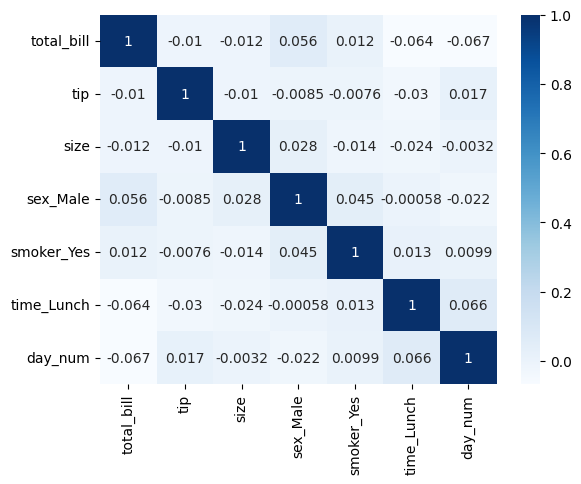

In [60]:
correlation_matrix = df_encoded.corr(method='pearson', numeric_only=False)
sb.heatmap(correlation_matrix, cmap="Blues", annot=True)